# Dice throw

Given n dice each with m faces, numbered from 1 to m, find the number of ways to get sum X. X is the summation of values on each face when all the dice are thrown.

In the simple case of two throws of a six-sided die, the combinations of eyes that will give total of seven eyes are:

  $  (6, 1), (5, 2), (4, 3), (3, 4), (2, 5), (1, 6)$
    
So six ways. 
    
To make it more general we can say that our dice are $m$-sided, that we have $n$ dice and that we want a total of $x$ eyes, and that the function that computes the number of ways to get $x$ is called $W(m, n, x)$.

If the first die shows $e \in \{1, ..., m\}$ eyes, then the number of ways to get $x$ eyes in total is $W(m, n-1, x-m)$. I.e., the number of ways the remaining $n-1$ dice produces $x-m$ eyes. Since the first die can show $m$ different values, we need to sum over those to get the total number of ways. This produces the following recursive formula:

$ \displaystyle W(m, n, x) = \sum_{e=1}^m W(m, n-1, x-e) $

We need a base case for the recursion. In the formula above, each recursive call reduce the problem in not one but two ways (the number of dice and the total number of eyes). n is reduced by 1 and x is reduced by $e$. So we actually have two base cases:

- If the total we want is not at least 1. I.e., $x < 1$, then $W(m, n, x)$ is 0.
- If there is only one die and if that die shows $m$ or fewer eyes then there is a single way to get $x$: So if $n = 1$ and $x \geq m$ then $W(m, n, x)$ is 1.

$$
  W(m, n, x) = 
  \begin{cases}
    0, & \text{if } x < 1 \\
    1, & \text{if } x \geq 1 \text{ and } n = 1  \text{ and } x \leq m \\
    \sum_{e=1}^m W(m, n-1, x-e), & \text{otherwise}
  \end{cases}
$$

## Exercise

Make sure you understand the recursion. Take a piece of paper and draw out the recursive function calls made when computing $W(6, 2, 7)$

## Exercise

Implement the recursive solution in Python.

If you call your function like this `find_nr_ways(6, 2, 7)`, it should return `6`. 

In [163]:
def find_nr_ways(m, n, x):
    if x < 1:
        # Base case: x < 1
        return 0
    elif n == 1 and x <= m:
        # Base case: n == 1 and x <== m
        return 1
    else:
        list_e = [find_nr_ways(m, n - 1, x - e) for e in range(1, m+1)]
        return sum(list_e)

result = find_nr_ways(6, 2, 7)
print(result)


6


## Exercise

The above problem exhibits overlapping subproblems. If there are three dice, each with 6 sides and we need to find the number of ways to get sum 8:

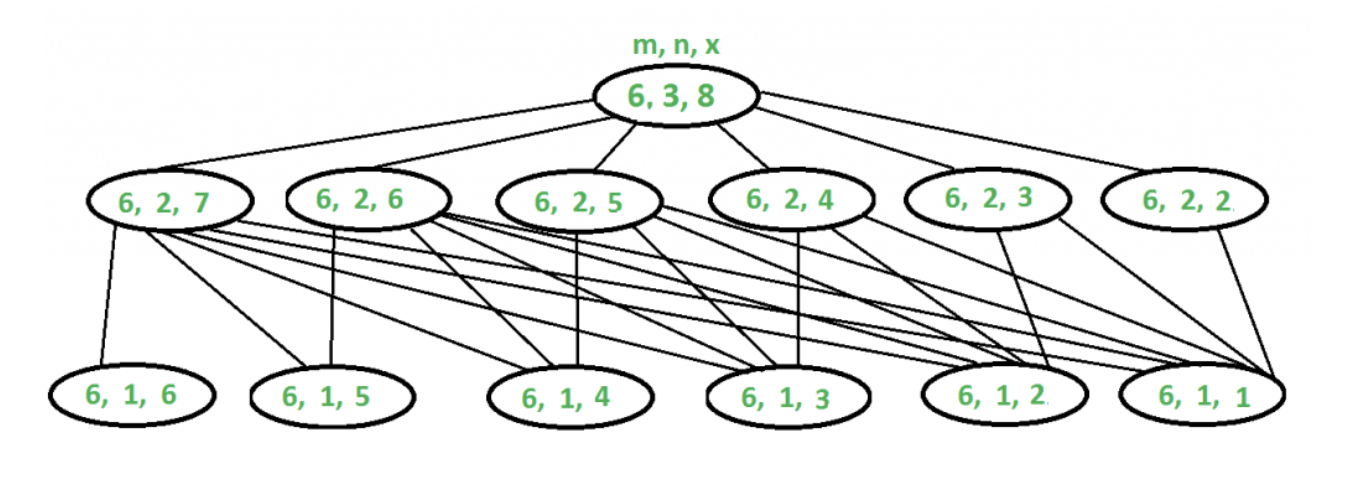

That may not seem like much of a problem, but try calling your function like this `find_nr_ways(20, 10, 100)` (yes a 20-sided die is a thing). It takes a long time. You can interrupt it by clicking the black square in the tool bar.

Still it was not for nothing, you have found a solution to your problem using recursion, now you can try to make it efficient using dynamic programming.

## Exercise

All your function calls share the first paramter `m`, but vary in their values of `n` and `x`. So what you need is a table where you can fill in the number of ways ($W(m, n, x)$) for each combination of `n` and `x`.

However, to fill it in, you also need to figure out how to compute the value in each cell from values in other cells. Draw a table on paper, look at the figure above, and decide which set of other cells you need to compute each cell.

Once you figure that out, you should be able to in what order you will need to fill in the cells in the table.

## Exercise

Implement a solution to the problem using dynamic programming

In [188]:
import numpy as np

def find_nr_ways(m,n,x): 
    # Create a table to store results of subproblems. One extra  
    # row and column are used for simplicity (number of dice  
    # is directly used as row index and sum is directly used  
    # as column index). The entries in 0th row and 0th column  
    # are never used. 

    # make an x+1 by n+1 table with all zeros
    table=[[0]*(x+1) for i in range(n+1)] 
    for j in range(1, x+1):
        for i in range(1, n+1):
            if j < 2 or j < n:
                table[i][j] = 0
            elif i == 1 and j <= m:
                table[i][j] = 1
            else:
                table[i][j] = table[i-1][j] + table[i][j-1]


    
                
                

      
    return table

find_nr_ways(20, 10, 100)

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,